# **Chapter 2. [텍스트] 뉴스기사 3줄 요약하기**


---
### 📝 **학습 목차**
> 2-1. 프로젝트 개요 <br>
> **2-2. 바이너리 파일을 문자열로 변경 - base64** <br>
> 2-3. 문자열 다루기 - textwrap, re <br>
> 2-4. 단어 개수 구하기 - collections.Counter <br>
> 2-5. 문서 요약하기 - gensim <br>
> 2-6. 텍스트 파일 저장 - open, close <br>
> 2-7. 프로젝트 실습

## 2-2. 바이너리 파일을 문자열로 변경

> ### **바이너리 파일 (Binary file)** 
> <img align='left' src='img/binary_icon.png' width='50' height='50'/> <br> <br> <br>
>
> - 바이너리 파일이란 ‘0’ 과 ‘1’ 을 이용한 **2진수 데이터** 만으로만으로 인코딩된 파일
> - 사람이 직접 읽을 수 없다
> - 데이터를 효율적으로 처리, 저장, 실행 등을 목적으로 만들어진 파일
> - 장점
>    - 데이터를 처리하고 전송하는데 일반적으로 비용이 적게 든다.
>    - 텍스트 파일에 비해서 데이터 처리 속도가 빠르다.
>    - 데이터 저장 공간도 적게 듦
> - 대표적인 확장자 : exe, dll, zip, rar, mp3, mpg, jpg, png 등


> ### **Base64 인코딩**
> - 다양한 통신채널 (HTML, 이메일 등) 을 통해 **바이너리 데이터**를 **안전하게 전송**할 수 있게 하는 방법
> - ASCII, Unicode 인코딩과 함께 실생활에서도 많이 사용되는 인코딩 방법
> - ASCII (8bit) 인코딩은 프로토콜,시스템마다 다르게 해석되어 데이터가 왜곡될 여지가 있기 때문에 적합하지 않음
> - XML이나 HTTP 프로토콜에서도 특수문자 파싱 문제를 해결할 수 있는 수단
> - 64 진법은 ASCII문자들을 모두 표현할 수 있는 가장 작은 진법
>    - `문자열 입력` -> `ASCII/Binary (8bit)` -> `6bit cut` -> `base64`
> - [Base64 인코딩 테이블](https://en.wikipedia.org/wiki/Base64)
> <img src='img/base64_example.png' width='600' height='600'/>

### 2-2-1. 바이트 문자열 인코딩/디코딩

In [1]:
import base64

In [2]:
string = 'Life is too short, We need Python !'

In [3]:
encoded = base64.b64encode(string)

TypeError: a bytes-like object is required, not 'str'

In [4]:
# ascii 인코딩
bstring = string.encode('ascii')
print(bstring)

b'Life is too short, We need Python !'


In [5]:
# base64 인코딩
encoded = base64.b64encode(bstring)

In [6]:
print(encoded)

b'TGlmZSBpcyB0b28gc2hvcnQsIFdlIG5lZWQgUHl0aG9uICE='


In [7]:
# base64 디코딩
decoded = base64.decodebytes(encoded)

In [8]:
print(decoded)

b'Life is too short, We need Python !'


In [9]:
# ascii 디코딩
decoded_str = decoded.decode('ascii')
print(decoded_str)

Life is too short, We need Python !


### 2-2-2. 이미지 인코딩/디코딩

#### 인코딩

In [10]:
import base64
path = "./img/0005303739_001_20220828154501895.jpg"

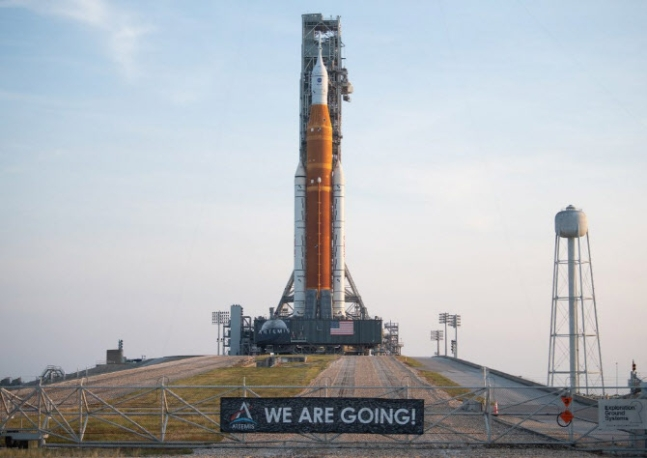

In [12]:
# 이미지 확인
from PIL import Image
img = Image.open(path)
img

In [13]:
# 바이너리 파일 읽기
with open(path, 'rb') as img:
    image = img.read()

In [14]:
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01\xca\x02\x87\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\x07\x08\t\x00\n\xff\xc4\x00Q\x10\x00\x01\x03\x02\x04\x04\x02\x08\x05\x03\x03\x02\x04\x03\x01\x11\x01\x02\x03\x04\x05\x11\x00\x06\x12!\x07\x131AQa\x08\x14"q\x81\x91\xa1\xf02\xb1\xc1\xd1\xe1\t\x15#\x16B\x

In [15]:
# 바이트 정보 확인
from bitstring import BitArray
input_str = '0xff'
c = BitArray(hex=input_str)
c.bin

'11111111'

In [16]:
# base64 인코딩
with open(path, 'rb') as img:
    data = img.read()
    encoded = base64.b64encode(data)
    print(encoded)

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAHKAocDASIAAhEBAxEB/8QAHgAAAQMFAQEAAAAAAAAAAAAABAIDBQEGBwgJAAr/xABREAABAwIEBAIIBQMDAgQDAREBAgMEBREABhIhBxMxQVFhCBQicYGRofAyscHR4QkVIxZC8VJiFyQzciWSorI0gtLiJkNjChgnNURTg6PC8v/EAB0BAAEFAQEBAQAAAAAAAAAAAAIAAQMEBQYHCAn/xABKEQACAQIEBAQEBAYBAwIDBAsBAhEDIQAEEjEFQVFhEyJx8IGRodEGMrHBFCNCUuHxBxUzYiRyCCVTFzRDY4KSFjU2RGSyc6LS/9oADAMBAAIRAxEAPwDsTDcpUc/4VRfPcb/H4ePXp4Yno1bhsD/CU6b773sO5G/gep+vbCDIJ02F+vTfxxKMAoBAB3Ftge4PTy6D3Y+jm4cGiX1AAiNERMT/AFcwD6d8fPS8UrKQVRVIsCtrWnkelumM5tV2Euydva9k2ULi+1ulh3tv4b4kW5jSk2ZtpIte4OxuN7G1sYRiEJTpBHtCxAPjcdPD8u2LmgynmE2QoBItcXsfMjzH8HFV+GKsALyGkdDI732E9sS0uK1iwWqbGBqk225CN4PPnGMotnWNFvxG3Xp/Hft364lo0ZFgHPwb6r9h2+v67DFnUyqI0hLqhcnY3APb6dfz88Xm1OjqQgGxFt7b7Hf2tiLeeKDUXRirLJG4+Vsa9KvTZRpaSTYd7RJuI78sTcCEgpUGydJ299t/v3YuOPE02G+97EDv4n+ehxEQJ8NCUg2tsOu3Tt

#### 디코딩

In [17]:
# base64 디코딩
decoded = base64.decodebytes(encoded)
print(decoded)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x01\xca\x02\x87\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\x07\x08\t\x00\n\xff\xc4\x00Q\x10\x00\x01\x03\x02\x04\x04\x02\x08\x05\x03\x03\x02\x04\x03\x01\x11\x01\x02\x03\x04\x05\x11\x00\x06\x12!\x07\x131AQa\x08\x14"q\x81\x91\xa1\xf02\xb1\xc1\xd1\xe1\t\x15#\x16B\x

In [18]:
# 이미지 파일로 저장
file = "img/decoded.png"

with open(file, 'wb') as file:
    file.write(decoded)